In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import pickle



In [10]:
#dsaplay all the columns
pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearningCourseWithPython/data/train.csv')

In [3]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [6]:
df.shape

(800, 22)

In [9]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [12]:
df.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [13]:
df['ethnicity'].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [14]:
#convert the age column to integer

df['age'] = df['age'].astype(int)

In [16]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [19]:
#print unique values for each column
for col in df.columns:
  numerical_values = [
      'ID',
      'age',
      'result'

  ]
  if col not in numerical_values:
    print(f'{col}:{df[col].unique()}')
    print("." * 50)



A1_Score:[1 0]
..................................................
A2_Score:[0 1]
..................................................
A3_Score:[1 0]
..................................................
A4_Score:[0 1]
..................................................
A5_Score:[1 0]
..................................................
A6_Score:[0 1]
..................................................
A7_Score:[1 0]
..................................................
A8_Score:[0 1]
..................................................
A9_Score:[1 0]
..................................................
A10_Score:[1 0]
..................................................
gender:['f' 'm']
..................................................
ethnicity:['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
..................................................
jaundice:['no' 'yes']
..................................................
austim

In [20]:
#dropping ID and age_desc column

df.drop(['ID','age_desc'],axis=1,inplace=True)

In [21]:
df.shape

(800, 20)

In [22]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

define the mapping dict for country names

In [23]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [24]:
mapping = {

      'Viet Nam':"Vietnam",
      'AmericanSamoa':"United States",
      'Hong Kong':'China',

}

df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [25]:
df['contry_of_res'] .unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [27]:
#target class distribution
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


insights:

1. missing values in ethinicity and relation
2. age_desc column has only 1 unique value, not important for prediction
3. fixed country name
4. identified class imbalance in the taget column


In [28]:
#EDA

df.shape

(800, 20)

In [29]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [30]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [32]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Univariate Analysis

In [33]:
#numerical colimns
# age
# results



In [36]:
sns.set(style="darkgrid")


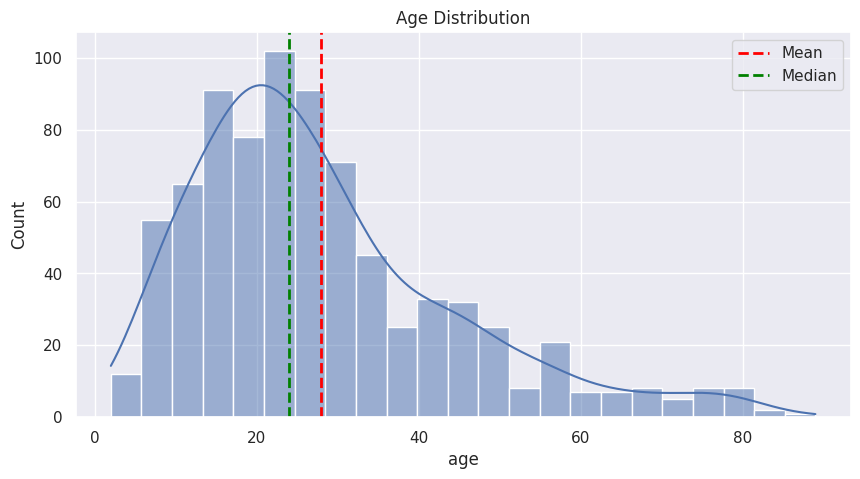

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'],kde=True)
plt.title('Age Distribution')

#calc mean and median
age_mean = df['age'].mean()
age_median = df['age'].median()

#add vertical line for mean and median
plt.axvline(age_mean,color='red',linestyle='dashed',linewidth=2 ,label='Mean')
plt.axvline(age_median,color='green',linestyle='dashed',linewidth=2,label='Median')
plt.legend()


plt.show()

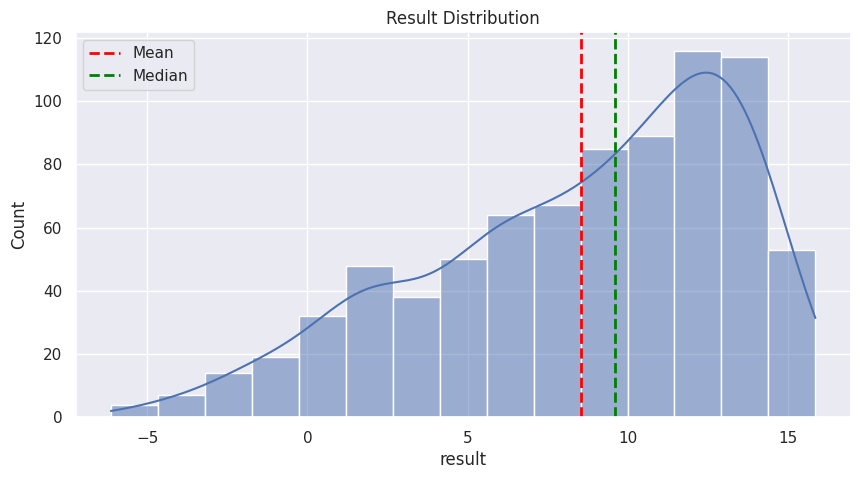

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(df['result'],kde=True)
plt.title('Result Distribution')

result_mean = df['result'].mean()
result_median = df['result'].median()

plt.axvline(result_mean,color='red',linestyle='dashed',linewidth=2 ,label='Mean')
plt.axvline(result_median,color='green',linestyle='dashed',linewidth=2,label='Median')
plt.legend()
plt.show()

boxplot for identifying outliers in numwricl column

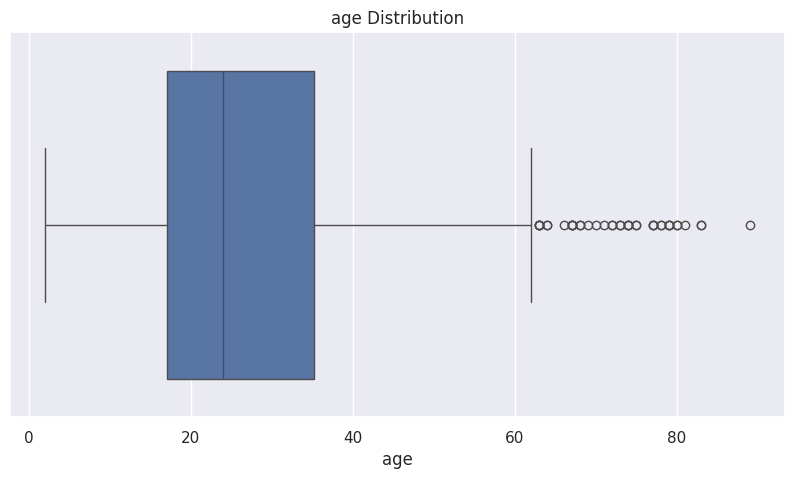

In [48]:
#box plot
plt.figure(figsize=(10,5))
sns.boxplot(x =df['age'])
plt.title('age Distribution')
plt.xlabel('age')
plt.show()

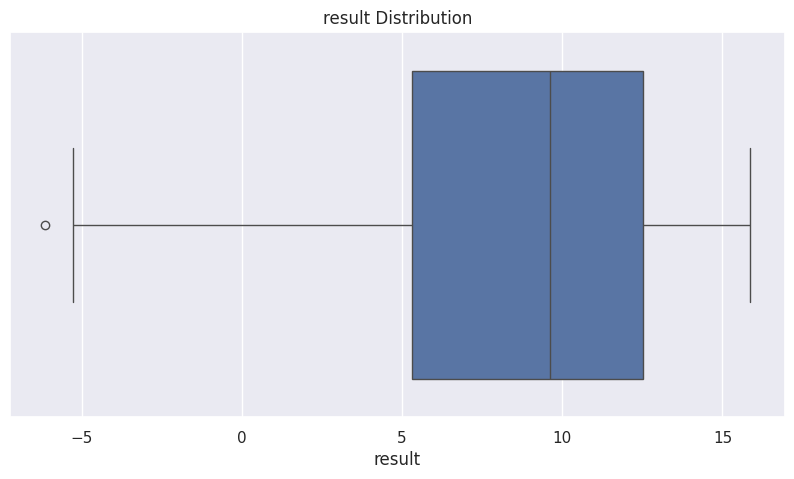

In [49]:
#box plot
plt.figure(figsize=(10,5))
sns.boxplot(x =df['result'])
plt.title('result Distribution')
plt.xlabel('result')
plt.show()



In [51]:
#count the outliers

q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
outlier_count = len(outliers)

print(f'Number of outliers in age column: {outlier_count}')

Number of outliers in age column: 39


In [52]:
q1=df['result'].quantile(0.25)
q3=df['result'].quantile(0.75)

iqr=q3-q1

lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr

outliers=df[(df['result']<lower_bound) | (df['result']>upper_bound)]

outlier_count=len(outliers)

print(f'Number of outliers in result column: {outlier_count}')


Number of outliers in result column: 1


univariate analysis of categorical columns

In [53]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [55]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'relation', 'Class/ASD']

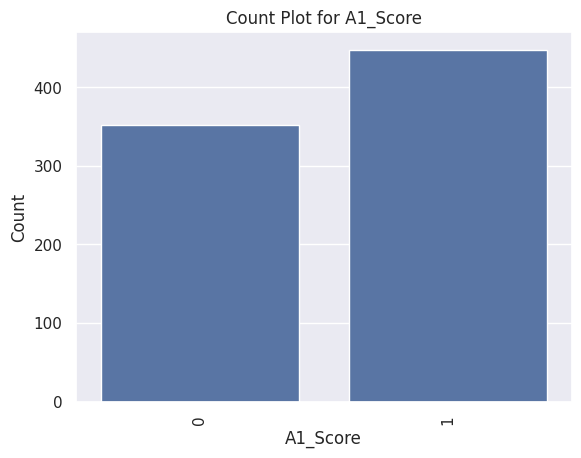

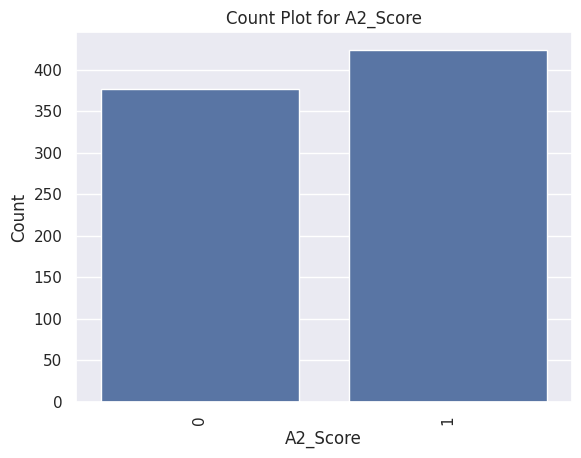

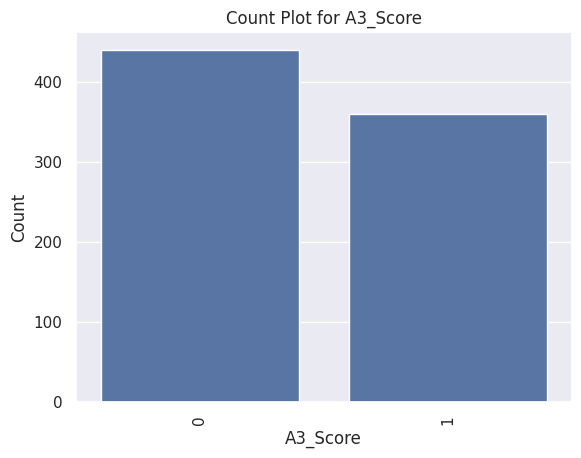

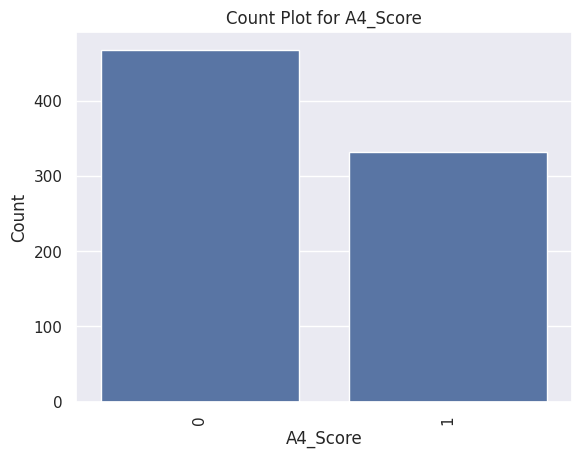

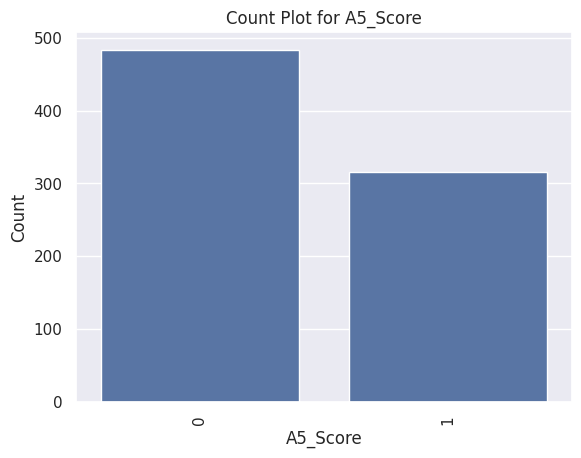

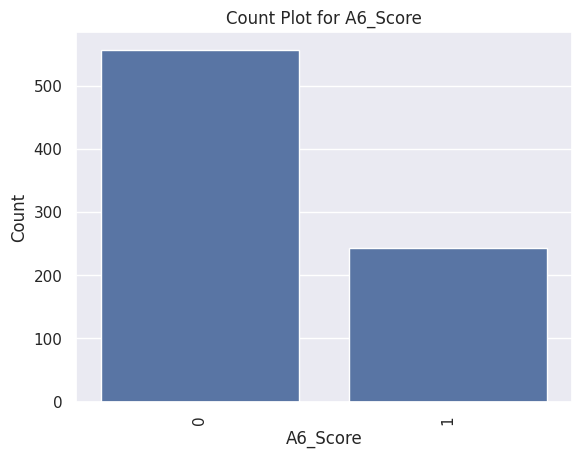

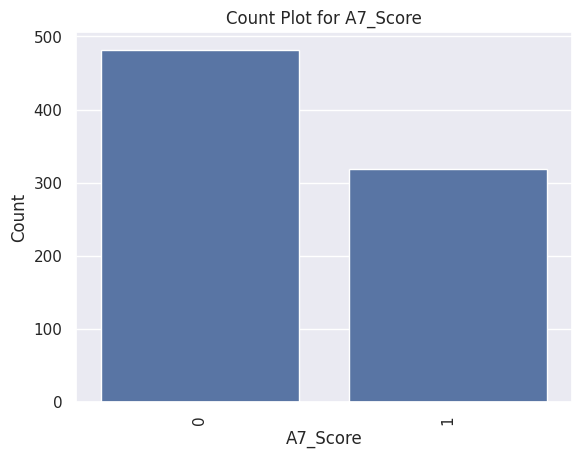

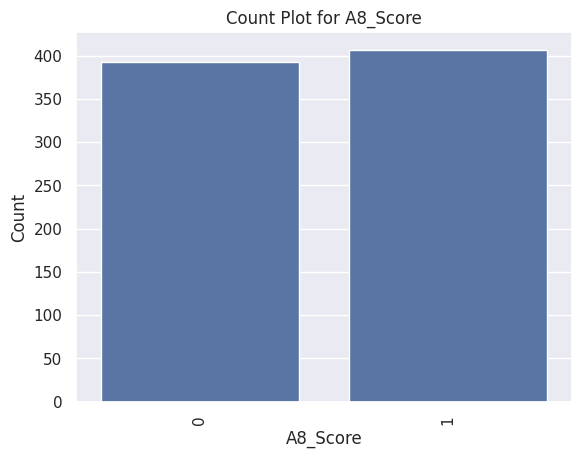

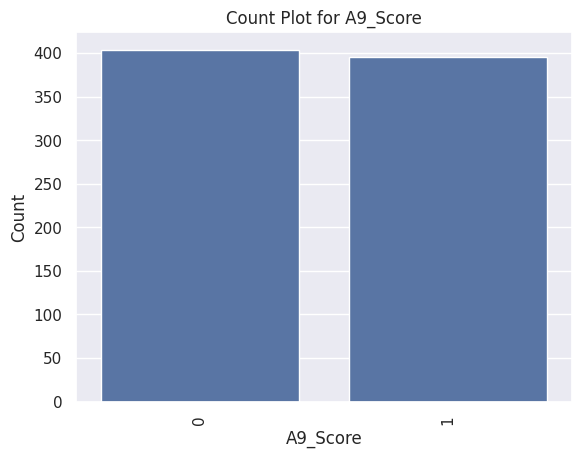

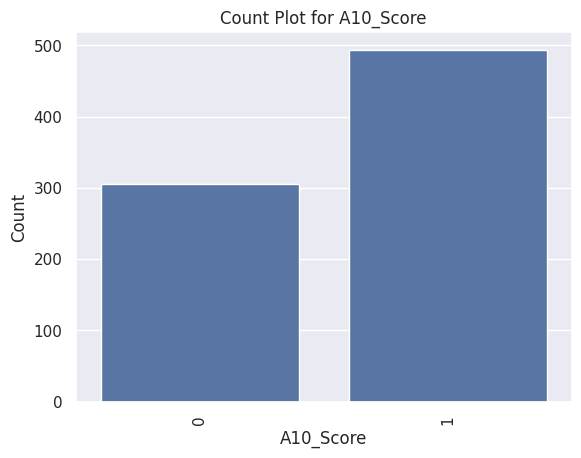

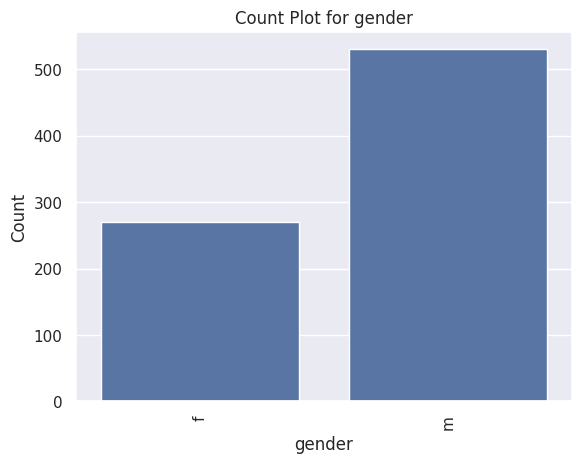

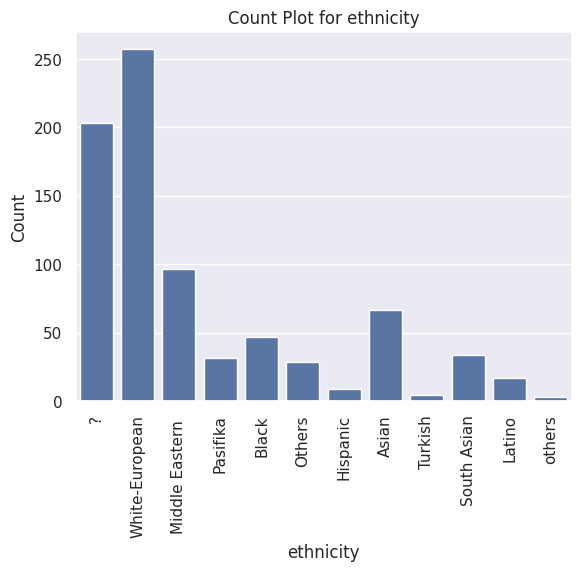

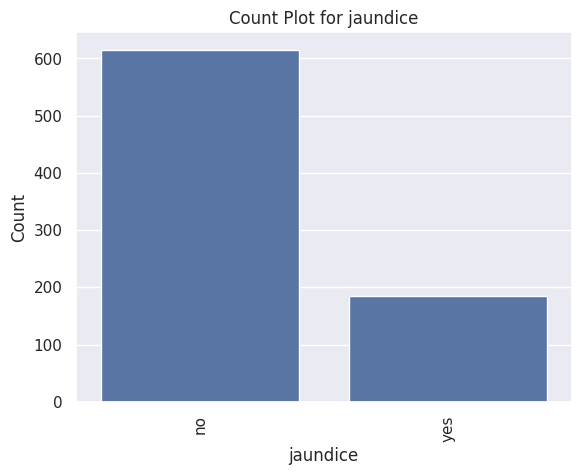

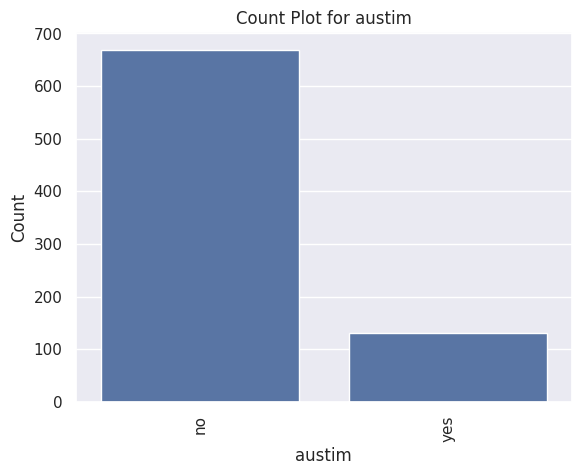

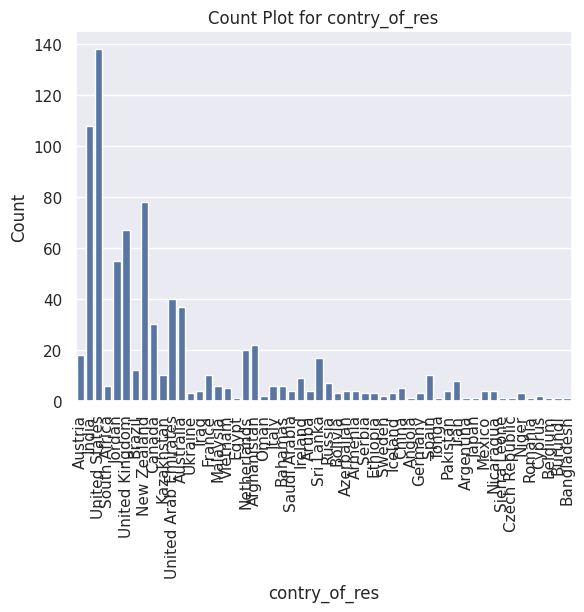

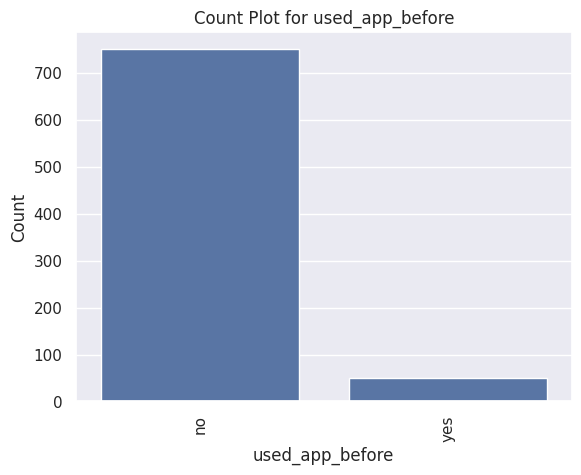

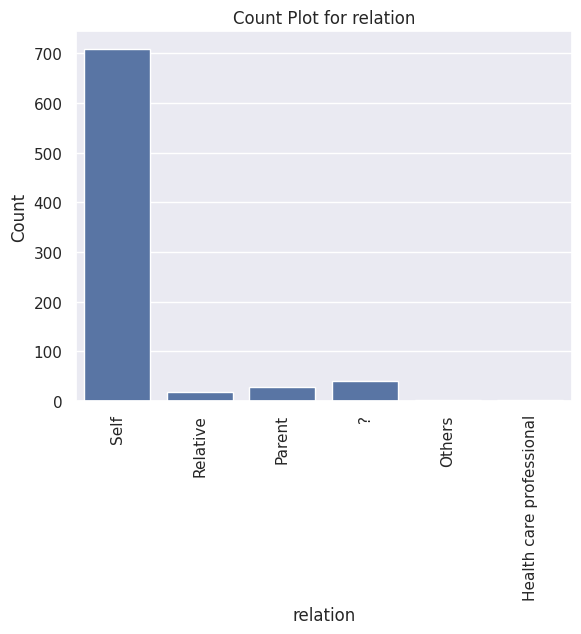

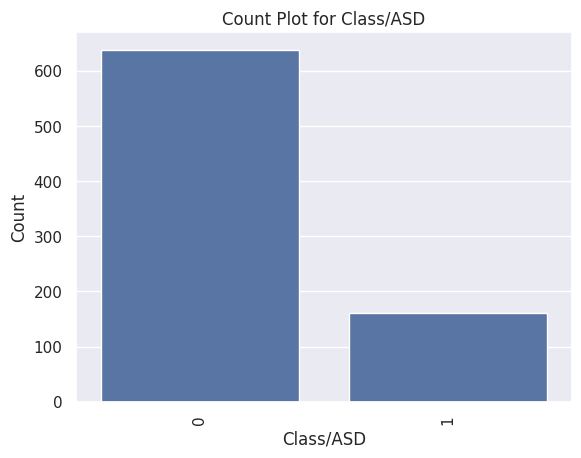

In [57]:
for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.xticks(rotation=90)
  plt.title(f'Count Plot for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()


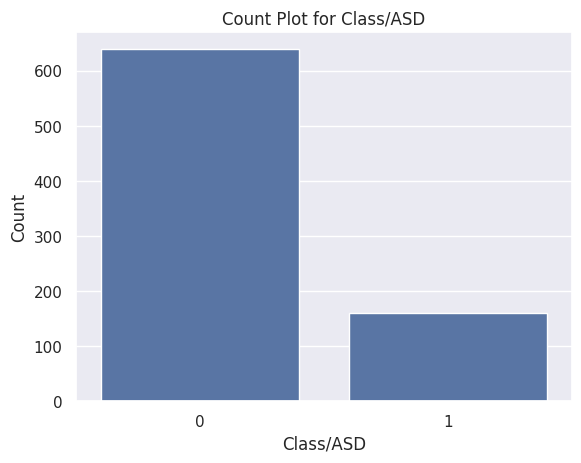

In [59]:
#countplot for target column

sns.countplot(x=df['Class/ASD'])
plt.title('Count Plot for Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

In [60]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [61]:
#handle missing values in ethnicity and relation column

df['ethnicity']=df['ethnicity'].replace({'?':'Others','others':'Others'})



In [65]:
df['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [64]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [63]:
df['relation']=df['relation'].replace({'?':'Others',

                                       'Relative':'Others',
                                       'Parent':'Others',
                                       'Health care professional':'Others'


                                       })


In [66]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Label Encoding

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    int64  
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result          

In [68]:
#identify columns with object datatype

object_columns = df.select_dtypes(include=['object']).columns

In [69]:
object_columns

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')

initialize a dictionart to store the encoders

In [70]:
encoders = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


#save te encoders as a pickle file

with open('label_encoders.pkl','wb') as file:
  pickle.dump(encoders,file)





In [71]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [72]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


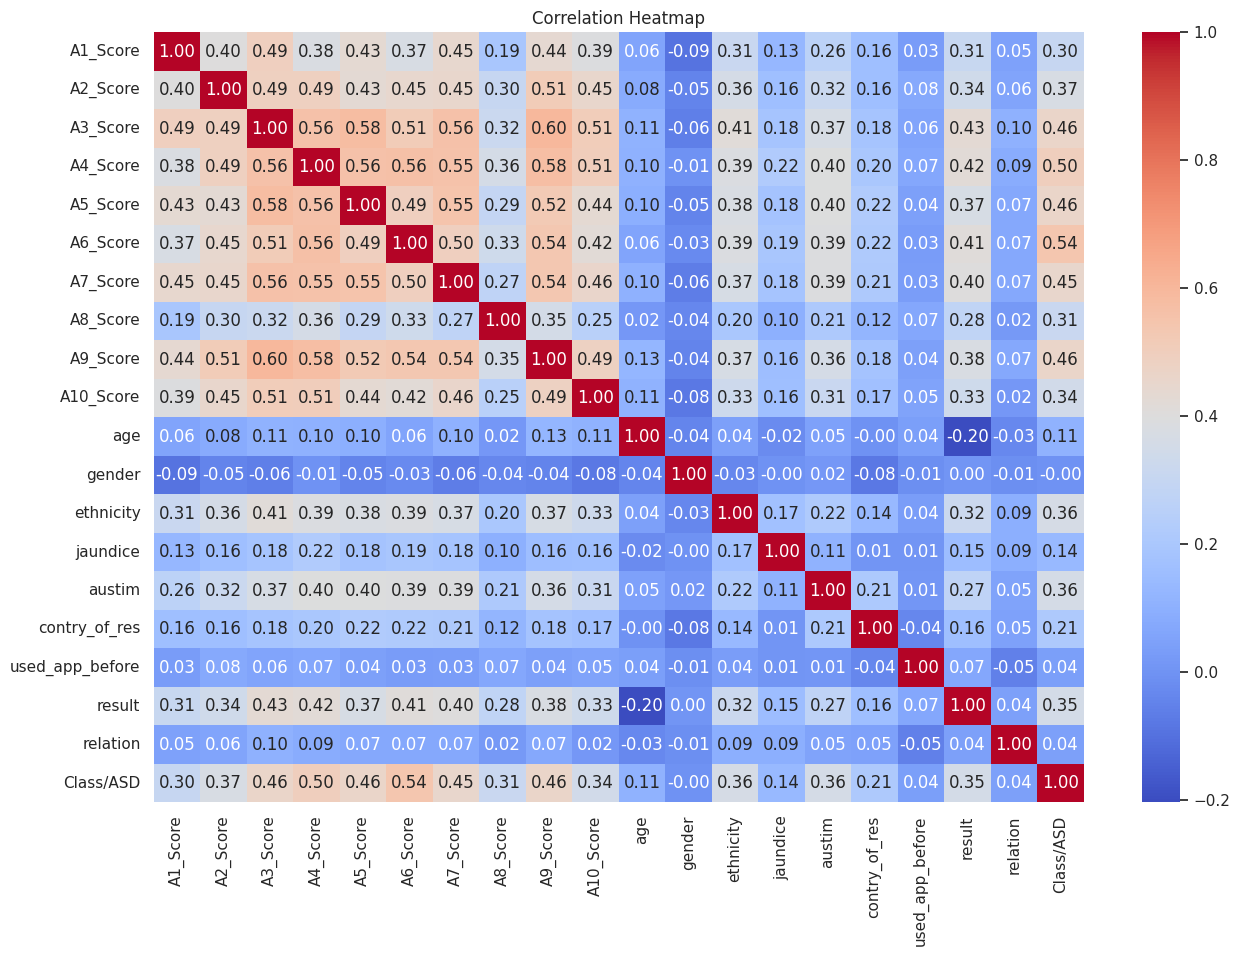

In [73]:
#Bivariate Analysis

#correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insights from EDA

1. there were few outliers in numberical columns(age,results)
2. there is class imbalance in target column
3. class imbalance in categorical columns
4. we do not have highly correlated columns
5. performed lable encoding and saved encoders



In [74]:
#Data preprocessing

#handle the outliers

# A fucntion to replace the outliers with median value

def replace_outliers_with_median(df,column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  median = df[column].median()

  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
  return df

In [75]:
df =replace_outliers_with_median(df,'age')

In [76]:
df = replace_outliers_with_median(df,'result')

In [78]:
df.shape

(800, 20)

In [79]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [80]:
X = df.drop('Class/ASD',axis=1)
y = df['Class/ASD']

In [82]:
print(X)
print(y)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 19)
(160, 19)
(640,)
(160,)


In [85]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


SMOTE (synthetic minority oversampling technique)

In [86]:
smote = SMOTE(random_state=42)
X_train_resampled,y_train_resampled = smote.fit_resample(X_train,y_train)


In [87]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(1030, 19)
(1030,)


In [88]:
y_train_resampled.value_counts()

,count
Class/ASD,
1,515
0,515


In [89]:
#Model training

#list of classifiers

models ={
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier':RandomForestClassifier(random_state=42),
    'XGBClassifier':XGBClassifier(random_state=42)
}



In [90]:
#dictionary to store cross validation results

cv_scores ={}

#perform 5-fold corss validation for each model

for model_name,model in models.items():
  print(f'Training {model_name}...')
  cv_score = cross_val_score(model,X_train_resampled,y_train_resampled,cv=5,scoring='accuracy')
  cv_scores[model_name] = cv_score
  print(f'{model_name} Cross Validation Accuracy: {np.mean(cv_score):.2f}')
  print("=" * 50)

Training DecisionTreeClassifier...
DecisionTreeClassifier Cross Validation Accuracy: 0.86
Training RandomForestClassifier...
RandomForestClassifier Cross Validation Accuracy: 0.92
Training XGBClassifier...
XGBClassifier Cross Validation Accuracy: 0.90


In [91]:
cv_scores

{'DecisionTreeClassifier': array([0.7961165 , 0.87864078, 0.87378641, 0.8592233 , 0.87378641]),
 'RandomForestClassifier': array([0.90776699, 0.92718447, 0.9223301 , 0.91747573, 0.9223301 ]),
 'XGBClassifier': array([0.87378641, 0.9223301 , 0.89320388, 0.91262136, 0.91747573])}

In [94]:
# Model selection an hyperparameter tuning

decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)






In [95]:
#hyperparameter grds for RandomSearchCV

param_grid_dt = {

    "criterion":['gini','entropy'],
    "max_depth":[None,10,30,50,70],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]

}

param_grid_rf = {

    "n_estimators":[50,100,200,500],

    "max_depth":[None,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "bootstrap":[True,False]
}


param_grid_xgb = {

    "n_estimators":[50,100,200,500],
    "max_depth":[3,5,7,10],
    "learning_rate":[0.01,0.1,0.2,0.5],
    "subsample":[0.8,0.9,1.0],
    "colsample_bytree":[0.8,0.9,1.0]
}


In [96]:
#performin hyperparameter tuninig for 3 tree based models

#below step can be autmated by for loops or pipeline

#perform Randomized search for each model

random_search_dt = RandomizedSearchCV(estimator=decision_tree,param_distributions=param_grid_dt,n_iter=10,cv=5,scoring='accuracy',random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest,param_distributions=param_grid_rf,n_iter=10,cv=5,scoring='accuracy',random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost,param_distributions=param_grid_xgb,n_iter=10,cv=5,scoring='accuracy',random_state=42)



In [97]:
#fit the models

random_search_dt.fit(X_train_resampled,y_train_resampled)
random_search_rf.fit(X_train_resampled,y_train_resampled)
random_search_xgb.fit(X_train_resampled,y_train_resampled)



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.5],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [100]:
#get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_



In [104]:
print(f'Best Model: {best_model}')
print(f'Best Cross validation Score: {best_score}')

Best Model: RandomForestClassifier(bootstrap=False, max_depth=10, random_state=42)
Best Cross validation Score: 0.9223300970873787


In [106]:
#svae the best model

with open("best_model.pkl","wb") as f:
  pickle.dump(best_model,f)

In [109]:
#load the best model

with open("best_model.pkl","rb") as f:
  best_model = pickle.load(f)

In [108]:
#evaluate on test data

y_pred = best_model.predict(X_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print('confusion matrix\n',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


accuracy score 0.8375
confusion matrix
 [[109  15]
 [ 11  25]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       124
           1       0.62      0.69      0.66        36

    accuracy                           0.84       160
   macro avg       0.77      0.79      0.78       160
weighted avg       0.84      0.84      0.84       160



To Do list
build a predictive system
try to improve the model

